# Convolutional XGBOOST Tutorial 
## Accuracy=99.557

This Kernal compares the classification capability of DenseNet Layers in CNN and XGBoost and Proposing a new model of Convolutional XGBoost which uses Convolutional layers for feature extraction and XGBoost for classification.

We Know that XGBoost is one of the best ensemble learning algorithms which works well for various ML applications. But they don't perform accurately when it comes to Image Classification or other deep learning application. While When we analyse the working of CNN we understand that convolution layers are used to select and extract features for the classification.

So I tried Experimenting on Intermediate results started with a hybrid approach between [GNB, XGB &CNN](https://www.kaggle.com/chekoduadarsh/hybrid-cnn-xgboost-gnb-accuracy-99) in K-MNIST which lead to my find out in the **most and most of the conditions XGB outperforms CNN with a minimum of 0.01 and maximum of 0.1 accuracies**

## Algorithm
![](https://i.ibb.co/4Th58KC/bg3.png)

As shown in Figure given above, our framework consists of three parts: data preprocessing, feature extraction, and regression analysis. 

In the data processing phase, we divide the raw meta-data features into two parts, i.e., the time-related ones, and the time-unrelated ones. The time-related ones include the “postdate” and “timezone”. The rest are time-unrelated ones, i.e., related to users and items. For the time-related ones, we deal with the “postdate” from the perspective of multiple time scales, and add the “timezone” as an additional feature. Furthermore, we propose a hybrid model 
for the subsequent two phases. More specifically, we use a CNN model consisting of four convolution layers and three full-linear layers on social cues to learn a high-level representation of the data in the feature extraction phase. In the regression analysis phase, we use XGBoost directly to make popularity predictions given the high-level features extracted by CNN.



In [32]:
import numpy as np
import pandas as pd 
import seaborn as sns
import os
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [33]:
data = pd.read_csv('/home/kent/college/data_sets/digit-recognizer/train.csv')
print(data.shape)

(42000, 785)


In [34]:
data

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
0           0  ...         0         0         0         0         0   
1           0  ...         0         0         0         0         0   
2           0  ...         0         0         0         0         0   
3           0  ...         0         0         0         0         0   
4           0  ...         0         0         0         0         0   
...       ...  ...       ...       ...       ...       ...       ...   
41995       0  ...         0         0         0         0         0   
41996       0  ...         0         0         0         0         0   
41997       0  ...         0         0         0         0         0   
41998       0  ...         0         0         0         0         0   
41999       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
0             0         0         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
3             0         0         0         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
41995         0         0         0         0         0  
41996         0         0         0         0         0  
41997         0         0         0         0         0  
41998         0         0         0         0         0  
41999         0         0         0         0         0  

[42000 rows x 785 columns]

In [35]:
test_data = pd.read_csv('/home/kent/college/data_sets/digit-recognizer/test.csv')
print(test_data.shape)

(28000, 784)


In [36]:
test_data

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27995       0       0       0       0       0       0       0       0       0   
27996       0       0       0       0       0       0       0       0       0   
27997       0       0       0       0       0       0       0       0       0   
27998       0       0       0       0       0       0       0       0       0   
27999       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
0           0  ...         0         0         0         0         0   
1           0  ...         0         0         0         0         0   
2           0  ...         0         0         0         0         0   
3           0  ...         0         0         0         0         0   
4           0  ...         0         0         0         0         0   
...       ...  ...       ...       ...       ...       ...       ...   
27995       0  ...         0         0         0         0         0   
27996       0  ...         0         0         0         0         0   
27997       0  ...         0         0         0         0         0   
27998       0  ...         0         0         0         0         0   
27999       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
0             0         0         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
3             0         0         0         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
27995         0         0         0         0         0  
27996         0         0         0         0         0  
27997         0         0         0         0         0  
27998         0         0         0         0         0  
27999         0         0         0         0         0  

[28000 rows x 784 columns]

In [37]:
sample_submission = pd.read_csv('/home/kent/college/data_sets/digit-recognizer/sample_submission.csv')
print(sample_submission.shape)

(28000, 2)


In [38]:
sample_submission

ImageId  Label
0            1      0
1            2      0
2            3      0
3            4      0
4            5      0
...        ...    ...
27995    27996      0
27996    27997      0
27997    27998      0
27998    27999      0
27999    28000      0

[28000 rows x 2 columns]

## Lets visualize, understand and convert data

In [39]:
train_data = data[:]
val_data = data[40000:]
train_label = np.float32(train_data.label)
val_label = np.float32(val_data.label)
train_image = np.float32(train_data[train_data.columns[1:]])
val_image = np.float32(val_data[val_data.columns[1:]])
test_image = np.float32(test_data[test_data.columns])
print('train shape: %s'%str(train_data.shape))
print('val shape: %s'%str(val_data.shape))
print('train_label shape: %s'%str(train_label.shape))
print('val_label shape: %s'%str(val_label.shape))
print('train_image shape: %s'%str(train_image.shape))
print('val_image shape: %s'%str(val_image.shape))
print('test_image shape: %s'%str(test_image.shape))

train shape: (42000, 785)
val shape: (2000, 785)
train_label shape: (42000,)
val_label shape: (2000,)
train_image shape: (42000, 784)
val_image shape: (2000, 784)
test_image shape: (28000, 784)


/home/kent/venv_DL/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

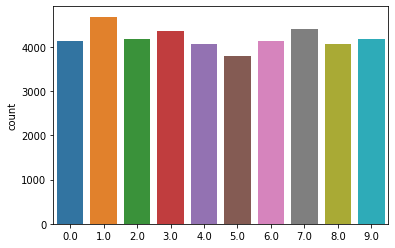

In [40]:
g = sns.countplot(train_label)
g

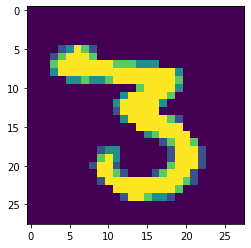

(784,)
train_image shape: (42000, 28, 28, 1)
train_image shape: (42000, 28, 28, 1)
val_image shape: (2000, 28, 28, 1)


In [41]:
plt.imshow(train_image[13].reshape(28,28))
plt.show()
print(train_image[13].shape)

train_image = train_image/255.0
val_image = val_image/255.0
test_image = test_image/255.0

train_image = train_image.reshape(train_image.shape[0],28,28,1)
val_image = val_image.reshape(val_image.shape[0],28,28,1)
test_image = test_image.reshape(test_image.shape[0],28,28,1)
print('train_image shape: %s'%str(train_image.shape))

print('train_image shape: %s'%str(train_image.shape))
print('val_image shape: %s'%str(val_image.shape))

train_label1 = train_label
val_label1 = val_label


In [42]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False,categories='auto')
yy = [[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]]
encoder.fit(yy)
# transform
train_label = train_label.reshape(-1,1)
val_label = val_label.reshape(-1,1)


train_label = encoder.transform(train_label)
val_label = encoder.transform(val_label)



print('train_label shape: %s'%str(train_label.shape))
print('val_label shape: %s'%str(val_label.shape))

train_label shape: (42000, 10)
val_label shape: (2000, 10)


In [43]:


import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
# from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras.layers import LeakyReLU



## Lets Model our CNN

I used the Keras Sequential API, where you have just to add one layer at a time, starting from the input.

The first is the convolutional (Conv2D) layer. It is like a set of learnable filters. I choosed to set 32 filters for the two firsts conv2D layers and 64 filters for the two last ones. Each filter transforms a part of the image (defined by the kernel size) using the kernel filter. The kernel filter matrix is applied on the whole image. Filters can be seen as a transformation of the image.

The CNN can isolate features that are useful everywhere from these transformed images (feature maps).

The second important layer in CNN is the pooling (MaxPool2D) layer. This layer simply acts as a downsampling filter. It looks at the 2 neighboring pixels and picks the maximal value. These are used to reduce computational cost, and to some extent also reduce overfitting. We have to choose the pooling size (i.e the area size pooled each time) more the pooling dimension is high, more the downsampling is important.

Combining convolutional and pooling layers, CNN are able to combine local features and learn more global features of the image.

Dropout is a regularization method, where a proportion of nodes in the layer are randomly ignored (setting their wieghts to zero) for each training sample. This drops randomly a propotion of the network and forces the network to learn features in a distributed way. This technique also improves generalization and reduces the overfitting.

'relu' is the rectifier (activation function max(0,x). The rectifier activation function is used to add non linearity to the network.

The Flatten layer is use to convert the final feature maps into a one single 1D vector. This flattening step is needed so that you can make use of fully connected layers after some convolutional/maxpool layers. It combines all the found local features of the previous convolutional layers.

In the end i used the features in two fully-connected (Dense) layers which is just artificial an neural networks (ANN) classifier. In the last layer(Dense(10,activation="softmax")) the net outputs distribution of probability of each class.


In [44]:
model = Sequential()
# input: 28x28 images with 1 channels -> (28, 28, 1) tensors.
# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1),padding='same'))
model.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(32, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(128, kernel_size=5, activation='relu',padding='same'))
model.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(128, kernel_size=5, activation='relu',padding='same'))
model.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(256, kernel_size=5, activation='relu',padding='same'))
model.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(256, kernel_size=5, activation='relu',padding='same'))
model.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())



#model = keras.applications.inception_v3.InceptionV3(weights= None, include_top=False, input_shape= (28,28,1))
model.add(Dense(256, activation='relu', name='my_dense'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer=sgd)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_8 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_9 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 28, 28, 32)       

## Creating a intermediate layer model to extract the data from 'my_dense' layer

In [45]:
from keras.models import Model
layer_name='my_dense'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)

intermediate_layer_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8_input (InputLayer)  [(None, 28, 28, 1)]      0         
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_8 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_9 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                           

## Using ImageDataGenerator to bring in augmentaion in data

In [46]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range = 15,
    horizontal_flip = False,
    zoom_range = 0.20)

## Adam Optimizer

The Adam optimization algorithm is an extension to stochastic gradient descent that has recently seen broader adoption for deep learning applications in computer vision and natural language processing.Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.

Adam was presented by Diederik Kingma from OpenAI and Jimmy Ba from the University of Toronto in their 2015 ICLR paper (poster) titled “Adam: A Method for Stochastic Optimization“. I will quote liberally from their paper in this post, unless stated otherwise.

You can try "RMSprop","Adadelta","SGD", etc.

categorical_crossentropy is mentioned thrice for 3 diffrenet outputs


In [48]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop

model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

datagen.fit(train_image)

# training
history = model.fit_generator(datagen.flow(train_image,train_label, batch_size=32),
                              epochs = 75,
                              shuffle=True,
                              validation_data = (val_image,val_label),
                              verbose = 1,
                              steps_per_epoch=train_image.shape[0] // 32)

/tmp/ipykernel_98144/3150666552.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(train_image,train_label, batch_size=32),


Epoch 1/75
1312/1312 [==============================] - 244s 185ms/step - loss: 0.7488 - accuracy: 0.7628 - val_loss: 0.0972 - val_accuracy: 0.9705
Epoch 2/75
 313/1312 [======>.......................] - ETA: 3:20 - loss: 0.2979 - accuracy: 0.9267

KeyboardInterrupt: 

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

## Extract the intermediate output from CNN

In [ ]:
intermediate_output = intermediate_layer_model.predict(train_image) 
intermediate_output = pd.DataFrame(data=intermediate_output)

In [ ]:
val_data = intermediate_output[40000:]

In [ ]:
submission_cnn = model.predict(test_image)

In [ ]:
intermediate_test_output = intermediate_layer_model.predict(test_image)
intermediate_test_output = pd.DataFrame(data=intermediate_test_output)

## Create XGB model and training it for intermediate values

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) artificial neural networks tend to outperform all other algorithms or frameworks. However, when it comes to small-to-medium structured/tabular data, decision tree based algorithms are considered best-in-class right now. Please see the chart below for the evolution of tree-based algorithms over the years.
![](https://miro.medium.com/max/1400/1*U72CpSTnJ-XTjCisJqCqLg.jpeg)

### Algorithmic Enhancements:

**Regularization:** It penalizes more complex models through both LASSO (L1) and Ridge (L2) regularization to prevent overfitting.

**Sparsity Awareness:** XGBoost naturally admits sparse features for inputs by automatically ‘learning’ best missing value depending on training loss and handles different types of sparsity patterns in the data more efficiently.

**Weighted Quantile Sketch:** XGBoost employs the distributed weighted Quantile Sketch algorithm to effectively find the optimal split points among weighted datasets.

**Cross-validation:** The algorithm comes with built-in cross-validation method at each iteration, taking away the need to explicitly program this search and to specify the exact number of boosting iterations required in a single run.

In [ ]:
from xgboost import XGBClassifier

xgbmodel = XGBClassifier(objective='multi:softprob', 
                      num_class= 10)
xgbmodel.fit(intermediate_output, train_label1)
xgbmodel.score(val_data, val_label1)

## Prediction for res

In [ ]:
submission_xgb = xgbmodel.predict(intermediate_test_output)

## Arrange the results and submission

In [ ]:
submission_cnn = submission_cnn.astype(int)
submission_xgb = submission_xgb.astype(int)


In [ ]:
submission_cnn
label = np.argmax(submission_cnn,1)
id_ = np.arange(0,label.shape[0])
label

In [ ]:
#if (xgbmodel.score(val_data, val_label1) > )
final_sub = submission_xgb

In [ ]:
save = pd.DataFrame({'ImageId':sample_submission.ImageId,'label':final_sub})
print(save.head(10))
save.to_csv('submission.csv',index=False)